# Final Project #Part 1

## Dataset introduction
In this project we use 'inc5000-2019.csv. It contains the information of 5000 Fastest Growing Pricate Companies in 2009 posted by Inc.com. The dataset comes from data.word.com, url:https://data.world/aurielle/inc-5000-2019. Original data sourced from Inc.com.

#### Liscense
This dataset is published in the public domain and shared to everyone.So I guess it has the liscnse typ of CC-0 <https://creativecommons.org/share-your-work/licensing-types-examples/public-domain/pdm/>. This license allows me to reuse the database indefinitely for my own work, but not for other people's works by me without permission.
#### Dataset size:
The dataset is 787KB,  including 5012 rows and 14 columns. There are 8 object columns, 4 int colummns, and 2 float64 columns in the original dataset.I will transform datatype for some columns in the next sections for calculation purpose.

| Column| Descriptinon|
|---|---|
rank: | the ranks in the list of top 5000 Inc
Profile:| companies' profile in inc.com website
name: | companies' name
url: | companies's offical website
state: | state location of the company
revenue: | total revenues
growth: | revenue growth
industry: | industry the company belongs to
workers: | amount of the workers
founded: | founded year
yrs_on_list: | How many years the company has been on the list
previosu_workers: | total number of former employees
metro: | the location of the core industrial area
city: | the city location of the company


# Data exploratory analytics
Here I performed data cleaning and some basic analysis. I want to use these data to observe the development trends of top companies and enterprises, and to dig out some interesting facts.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://query.data.world/s/ht7xdrrd5gmthunpjxb7zg4yj7mymt')

In [4]:
df.head(3)

,_ - rank,Profile,name,url,state,_ - revenue,_ - growth,_ - industry,_ - workers,_ - founded,_ - yrs_on_list,_ - previous_workers,_ - metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,1,5,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,1,8,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,2015,1,10,Austin,Austin


## Data Preprocess

* The columns name are not in a good format, we should replace all columns' headers
* There might be some null values in each column
* The workers column is float. We need to transform it to int format
* The revenue column contains 'Million'. We need to remove it and transform the column into numerical value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _ - rank              5012 non-null   int64  
 1   Profile               5012 non-null   object 
 2   name                  5012 non-null   object 
 3   url                   5012 non-null   object 
 4   state                 5012 non-null   object 
 5   _ - revenue           5012 non-null   object 
 6   _ - growth            5012 non-null   float64
 7   _ - industry          5012 non-null   object 
 8   _ - workers           5011 non-null   float64
 9   _ - founded           5012 non-null   int64  
 10  _ - yrs_on_list       5012 non-null   int64  
 11  _ - previous_workers  5012 non-null   int64  
 12  _ - metro             4199 non-null   object 
 13  city                  5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


### Clear the format of all columns' headers

In [6]:
df = df.rename(columns={'_ - rank':'rank', '_ - revenue':'revenue', '_ - growth':'growth', '_ - industry':'industry', '_ - workers':'workers', '_ - founded':'founded', '_ - yrs_on_list':'yrs_on_list', '_ - previous_workers':'previous_workers', '_ - metro':'metro'})
df.head(2)

,rank,Profile,name,url,state,revenue,growth,industry,workers,founded,yrs_on_list,previous_workers,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,1,5,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,1,8,Nashville,Brentwood


### Drop null values in certain colums
* Here we only drop null values in workers, because we will not take company with no workers into consideration

In [7]:
df['workers'].dropna()

0        40.0
1        39.0
2       190.0
3        57.0
4        25.0
        ...  
5007     88.0
5008    380.0
5009    187.0
5010    132.0
5011     27.0
Name: workers, Length: 5011, dtype: float64

### Transfrom the format of 'workers' from float to int

In [8]:
#df['workers '] = df['workers'].astype(int)

Here I ran into a problem: I failed to convert the format, even though I tried several ways to remove/replace null values. So I'm skipping this step for now as I don't need the columns in later analysis.

### Clear the format of 'Revenue' , keep the numerical part and output the float type
There are two types of measures in the Revenue column, in Billion and Million. To unify the measures, first, we split the columns into a numeric column and a measure columns. Then, for each revenue in billions, we convert it to a value in millions by multiplying by 1000.

In [9]:
df[['revenue_in_million','measure']] = df.revenue.str.split(expand=True)
df['multiple'] = [ 1000 if m=='Billion' else 1 for m in df['measure']]
df['revenue_in_million']=df['revenue_in_million'].astype(float)
df['revenue_in_million']=df['revenue_in_million']*df['multiple']
df[df['measure']=='Billion'].head()
df = df.drop(columns={'measure','multiple'})
df.head()

,rank,Profile,name,url,state,revenue,growth,industry,workers,founded,yrs_on_list,previous_workers,metro,city,revenue_in_million
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,1,5,Phoenix,Phoenix,36.9
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,1,8,Nashville,Brentwood,33.6
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,2015,1,10,Austin,Austin,24.9
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2014,1,2,NaN,Albuquerque,32.4
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,2014,1,6,Philadelphia,Philadelphia,22.5


### Duplicate values
* No duplicated values to address

In [10]:
df.duplicated().sum()

0

## Data analytics
### Analyze industry distribution

In [11]:
df_counts = df.groupby('industry')['name'].count().reset_index().sort_values('name', ascending=False)
df_counts.set_index('industry', inplace=True)
new_df_counts = df_counts['name'].astype(int).head(10)

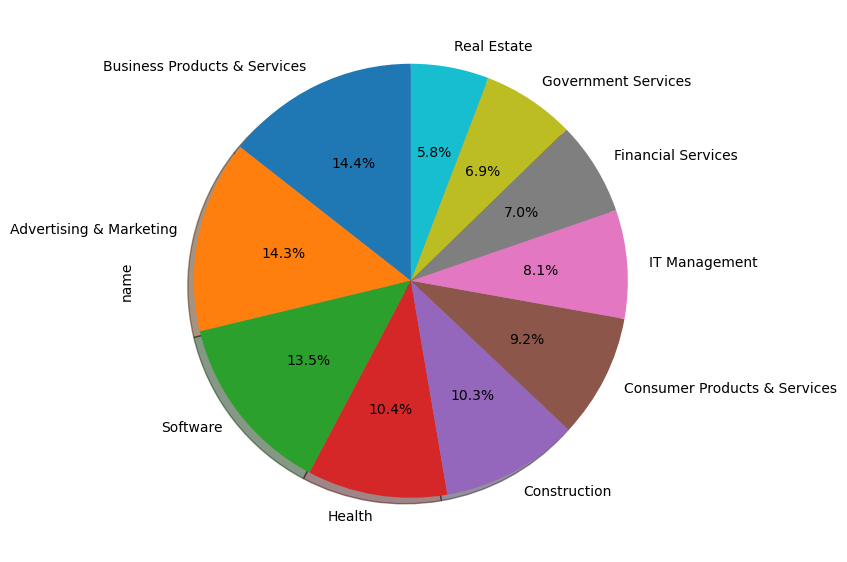

In [12]:
new_df_counts.plot(
kind='pie',
figsize=(7, 8),
autopct='%1.1f%%', 
startangle=90,     
shadow=True, 
)

### Wrap up

We can obtain from the pie chart that the largest proportion of companies is in  Busines Products&Service industry, followed by the advertising marketing industry and Software industry. These 3 industries account for almost 30% of the total.

### Analyze the distribution of revenue
* Find revenue outliers
* Find top 10 industry by revenue average

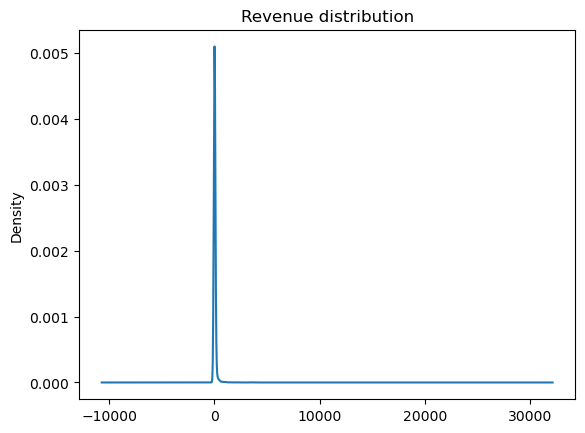

In [13]:
df['revenue_in_million'].plot(kind='kde', title='Revenue distribution')

No distinct outliers in the plot

#### Find the top 10 profitabe industry

In [14]:
average_revenue = df.groupby('industry').revenue_in_million.agg(revenue_average='mean').reset_index().sort_values('revenue_average', ascending=False)

In [15]:
average_revenue.head(10)

,industry,revenue_average
23,Security,123.747761
12,Health,109.330056
18,Logistics & Transportation,101.293011
6,Energy,80.221795
13,Human Resources,73.582166
4,Consumer Products & Services,72.073651
22,Retail,66.552761
11,Government Services,59.391949
17,Insurance,58.742857
3,Construction,58.422571


In [16]:
average_revenue.set_index('industry', inplace=True)

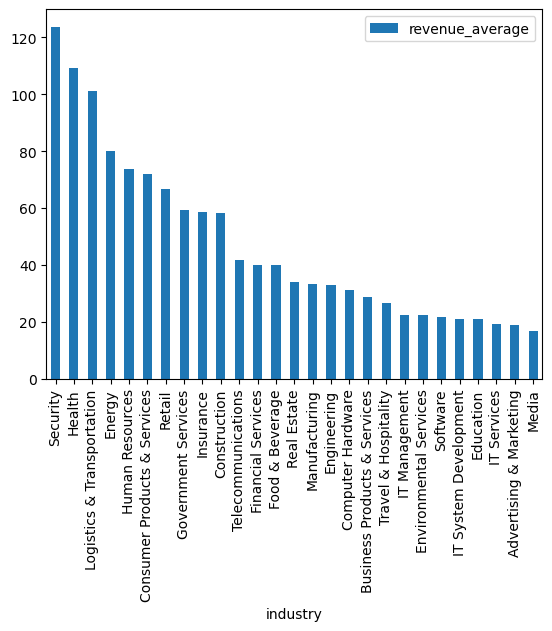

In [17]:
average_revenue.plot(kind='bar')

### Wrap up

We can obtain from the bar chart that the most profitable industries are Insurance, follwed by Logistics&Transportation, Health, Energy, Finanica Service.Comparing to previous analysis, it's interesting to find the top 3 industries with the highest proportion are not among the top 10 profitable industries. We can infer that the number of companies in each type of business package is not related to the average turnover of the industry.

In addition, it is worth noting that the health industry accounts for a large proportion(ranked 4th)with a high revenue(ranked 3rd), representing a good develpment trends. In order to interpret the dataset more comprehensively, we will explore more dimensions to evaluate the performance of different industries to highlight industries with development potential.

### Pivot Table

In [18]:
table = pd.pivot_table(df, values='revenue_in_million', index=['state'],
                      columns=['industry'], aggfunc=np.mean)

In [19]:
table.head()

industry,Advertising & Marketing,Business Products & Services,Computer Hardware,Construction,Consumer Products & Services,Education,Energy,Engineering,Environmental Services,Financial Services,...,Insurance,Logistics & Transportation,Manufacturing,Media,Real Estate,Retail,Security,Software,Telecommunications,Travel & Hospitality
state,,,,,,,,,,,,,,,,,,,,,
AL,7.800000,3.650000,NaN,17.600000,NaN,NaN,NaN,80.216667,41.7,12.000000,...,NaN,12.80,10.000000,4.000000,24.733333,3.100,NaN,NaN,7.650,NaN
AR,15.800000,NaN,NaN,15.400000,3.700000,NaN,NaN,NaN,NaN,2.600000,...,NaN,NaN,7.400000,NaN,5.600000,27.900,NaN,NaN,NaN,NaN
AZ,18.883333,36.616667,25.65,29.188889,17.530000,8.400000,47.650000,NaN,NaN,9.640000,...,NaN,33.40,14.814286,NaN,29.714286,34.200,26.066667,23.200000,28.800,5.500000
CA,20.732584,15.701449,22.20,26.707143,242.967308,47.266667,47.922222,28.177778,52.7,35.429167,...,61.225,26.21,19.372727,13.557143,33.053846,22.475,670.166667,25.144944,55.430,26.255556
CO,11.033333,15.676923,33.55,94.880000,31.290000,21.833333,32.700000,12.850000,NaN,21.100000,...,NaN,24.95,39.575000,27.500000,10.633333,20.200,14.800000,11.970588,32.025,6.433333
